In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [51]:
data = pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


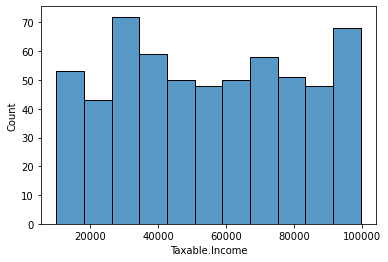

In [11]:
sns.histplot(data['Taxable.Income']);

In [52]:
data = data.rename(columns={'Marital.Status':'marital_status','Taxable.Income':'taxable_income','City.Population':'city_population','Work.Experience':'work_exp',})
data

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [53]:
data['is_Check']= ['Risky' if x <= 30000 else 'Good' for x in data['taxable_income']]
data

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban,is_Check
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [54]:
lable_encoder = preprocessing.LabelEncoder()
data['Risky'] = lable_encoder.fit_transform(data['is_Check'])

In [55]:
data['Mar_status'] = lable_encoder.fit_transform(data.marital_status)

In [56]:
data['Graduate'] = lable_encoder.fit_transform(data.Undergrad)

In [57]:
data['urban'] = lable_encoder.fit_transform(data.Urban)

In [22]:
data

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban,is_Check,Risky,Mar_status,Graduate,urban
0,NO,Single,68833,50047,10,YES,Good,0,2,0,1
1,YES,Divorced,33700,134075,18,YES,Good,0,0,1,1
2,NO,Married,36925,160205,30,YES,Good,0,1,0,1
3,YES,Single,50190,193264,15,YES,Good,0,2,1,1
4,NO,Married,81002,27533,28,NO,Good,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good,0,0,1,1
596,YES,Divorced,69967,55369,2,YES,Good,0,0,1,1
597,NO,Divorced,47334,154058,0,YES,Good,0,0,0,1
598,YES,Married,98592,180083,17,NO,Good,0,1,1,0


In [58]:
data= data.drop(['Undergrad','marital_status','Urban','is_Check','taxable_income'],axis=1)

In [59]:
data=data[['city_population','work_exp',"Mar_status",'Graduate','urban','Risky']]
data

,city_population,work_exp,Mar_status,Graduate,urban,Risky
0,50047,10,2,0,1,0
1,134075,18,0,1,1,0
2,160205,30,1,0,1,0
3,193264,15,2,1,1,0
4,27533,28,1,0,0,0
...,...,...,...,...,...,...
595,39492,7,0,1,1,0
596,55369,2,0,1,1,0
597,154058,0,0,0,1,0
598,180083,17,1,1,0,0


In [60]:
X = data.iloc[:,0:5]
Y = data.iloc[:,5]

In [61]:
data['Risky'].unique()

array([0, 1])

In [62]:
data['Risky'].value_counts()

0    476
1    124
Name: Risky, dtype: int64

In [63]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [64]:
model.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [65]:
cv = KFold(n_splits=10)
result = cross_val_score(model,X,Y,cv=cv)

In [66]:
cv = KFold(n_splits=10)
result = cross_val_score(model,X,Y,cv=cv)

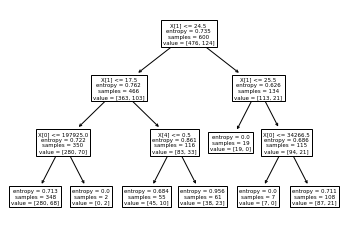

In [33]:
tree.plot_tree(model);

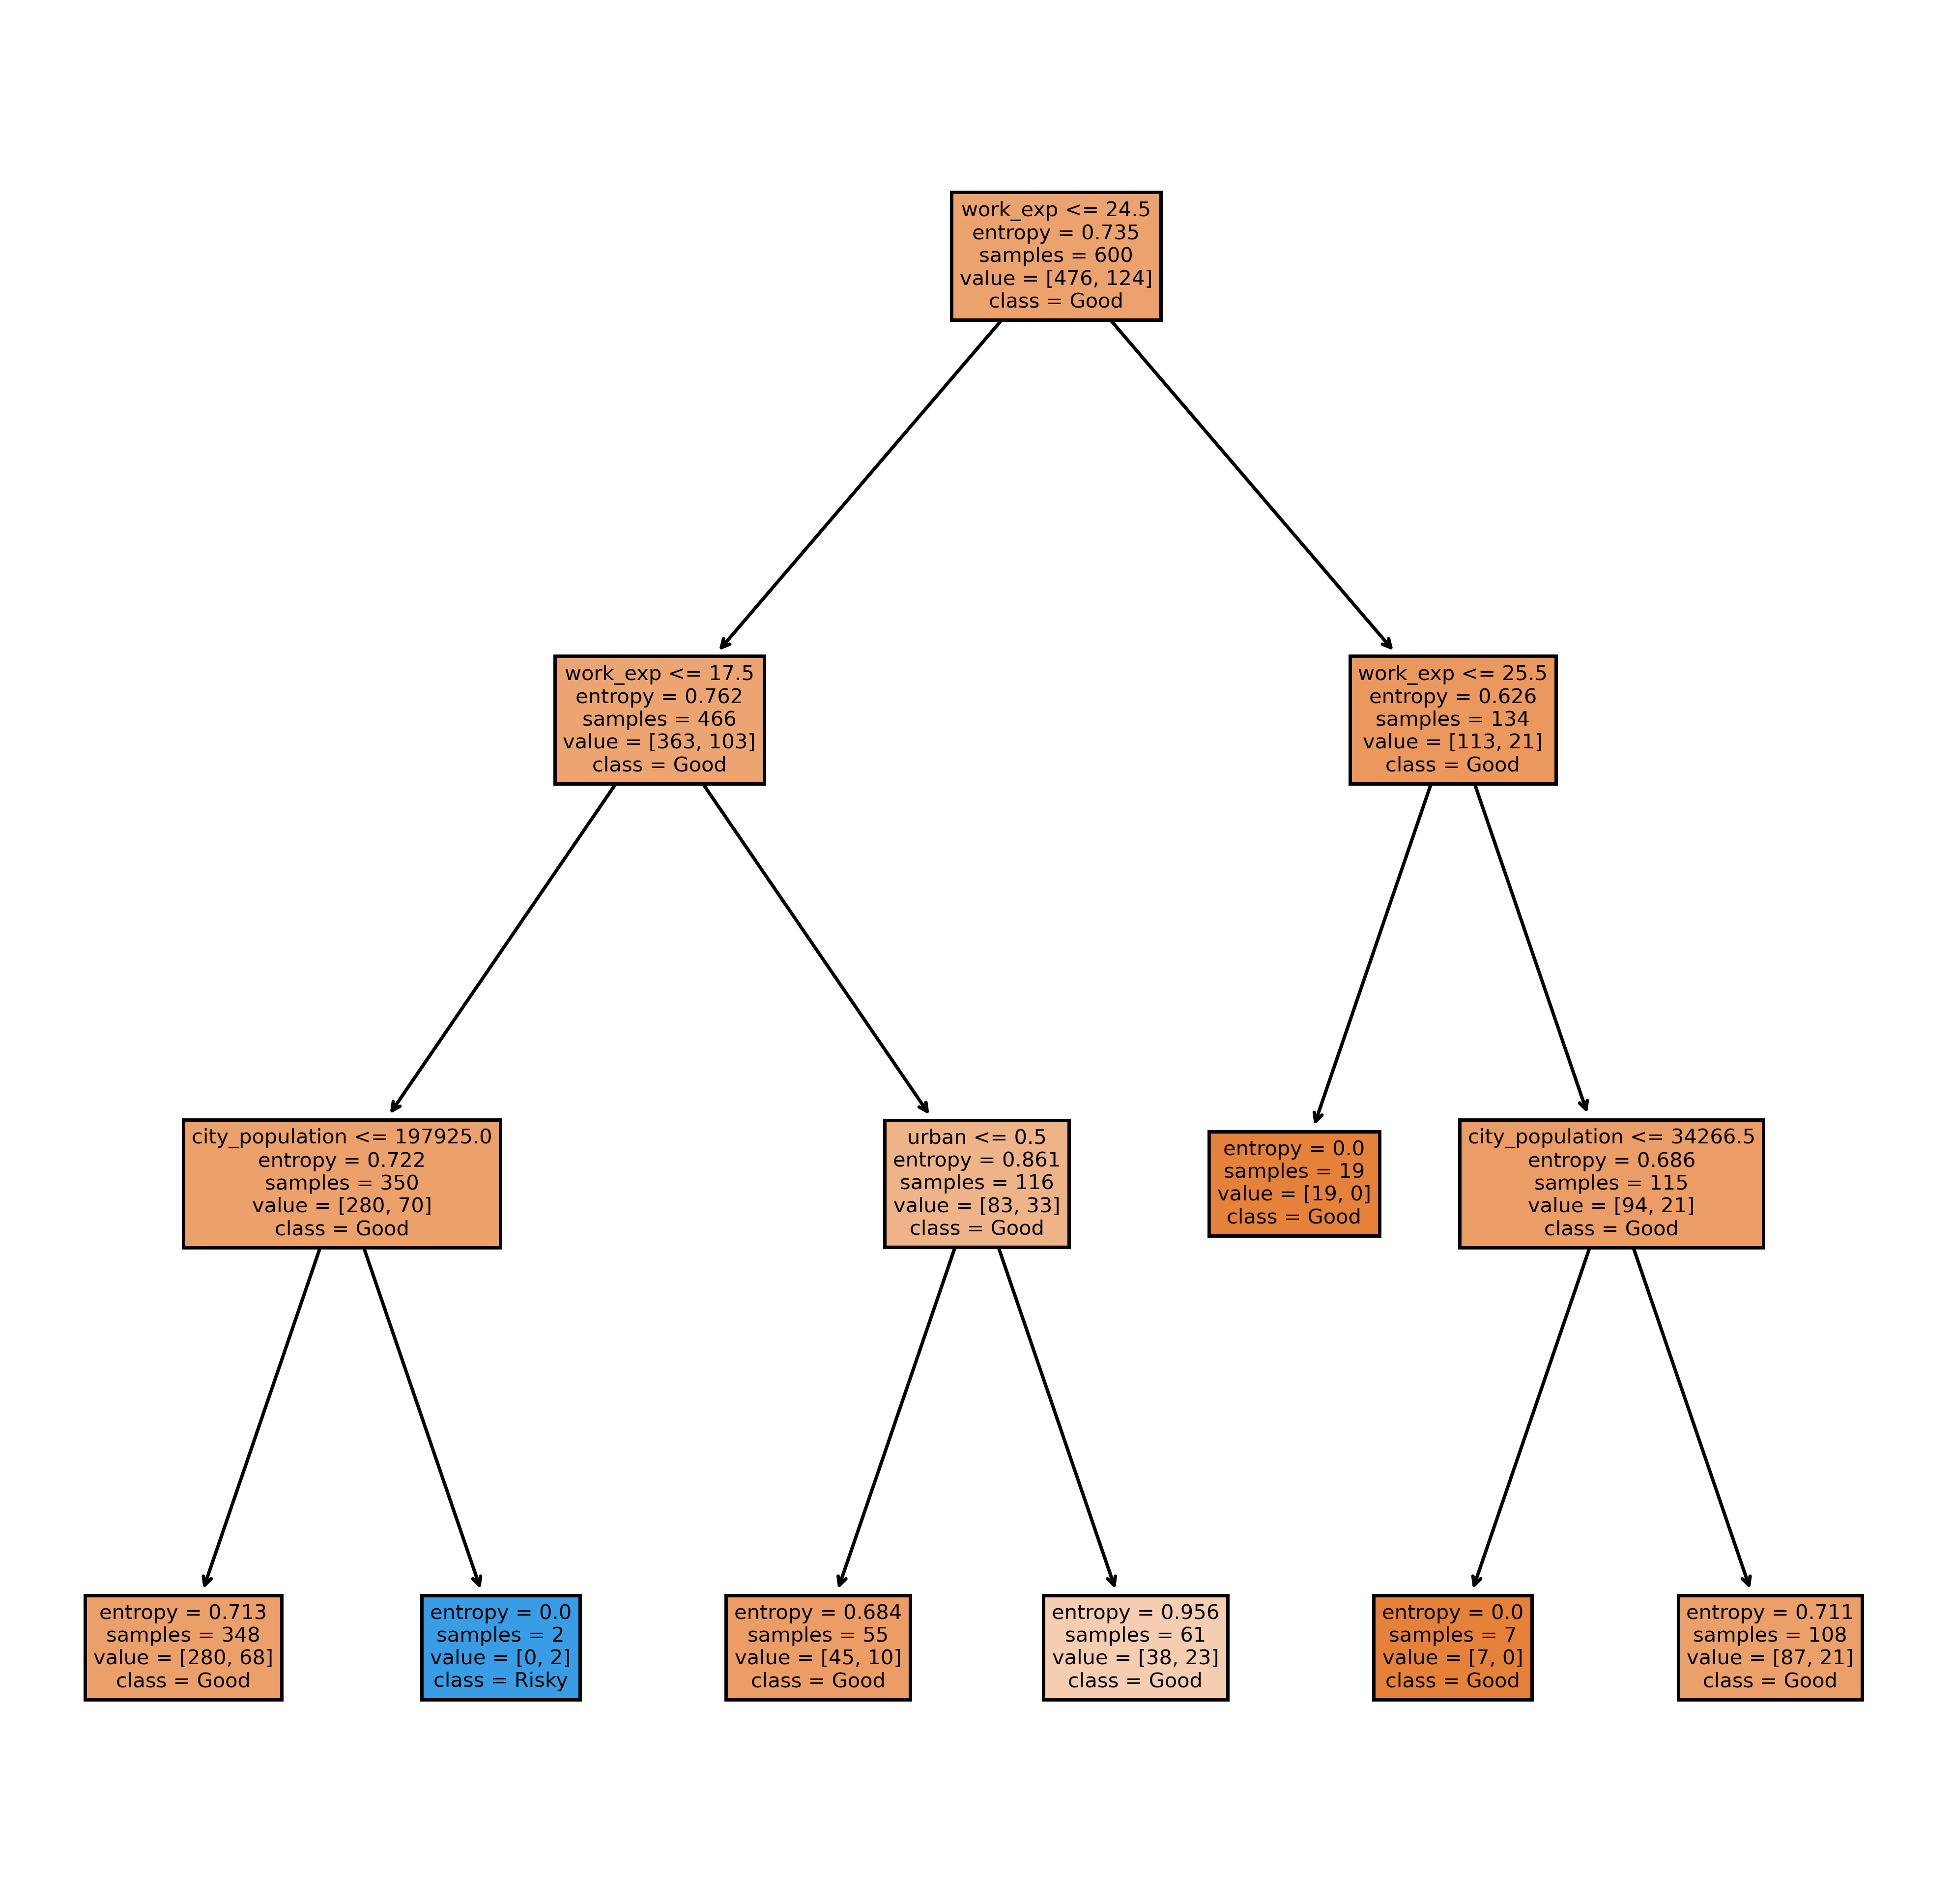

In [34]:
fn=['city_population','work_exp','Mar_status','Graduate','urban']
cn=['Good','Risky']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=500)
tree.plot_tree(
    model,
    feature_names=fn,
    class_names=cn,
    filled=True
);


In [67]:
preds = model.predict(X) 
pd.Series(preds).value_counts()

0    598
1      2
dtype: int64

In [68]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [69]:
pd.crosstab(Y,preds)

col_0,0,1
Risky,,
0,476,0
1,122,2


In [70]:
np.mean(preds==Y)

0.7966666666666666

# question 2 company data set

In [3]:
data1= pd.read_csv('Company_Data.csv')
data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
data1.shape

(400, 11)

In [10]:
data1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [13]:
data1['Sales']=pd.cut(data1.Sales, bins=[0,5,7,20], labels=['low','medium','high'])

In [14]:
data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high,111,48,16,260,83,Good,65,10,Yes,Yes
2,high,113,35,10,269,80,Medium,59,12,Yes,Yes
3,high,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,Good,33,14,Yes,Yes
396,medium,139,23,3,37,120,Medium,55,11,No,Yes
397,high,162,26,12,368,159,Medium,40,18,Yes,Yes
398,medium,100,79,7,284,95,Bad,50,12,Yes,Yes


In [16]:
data2=data1.dropna()
data2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high,111,48,16,260,83,Good,65,10,Yes,Yes
2,high,113,35,10,269,80,Medium,59,12,Yes,Yes
3,high,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,Good,33,14,Yes,Yes
396,medium,139,23,3,37,120,Medium,55,11,No,Yes
397,high,162,26,12,368,159,Medium,40,18,Yes,Yes
398,medium,100,79,7,284,95,Bad,50,12,Yes,Yes


In [17]:
data2['Sales'].unique()

['high', 'low', 'medium']
Categories (3, object): ['low' < 'medium' < 'high']

In [18]:
label_encoder = preprocessing.LabelEncoder()
data2['Sales']= label_encoder.fit_transform(data2['Sales']) 

<ipython-input-18-e0fb6826dc30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Sales']= label_encoder.fit_transform(data2['Sales'])


In [19]:
data2['Sales'].unique()

array([0, 1, 2])

In [20]:
data2.Sales.value_counts()

0    216
2    107
1     76
Name: Sales, dtype: int64

In [22]:
data2['ShelveLoc']= label_encoder.fit_transform(data2['ShelveLoc']) 

<ipython-input-22-87cc417a1c4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['ShelveLoc']= label_encoder.fit_transform(data2['ShelveLoc'])


In [23]:
data2['ShelveLoc'].unique()

array([0, 1, 2])

In [24]:
data2.ShelveLoc.value_counts()

2    218
0     96
1     85
Name: ShelveLoc, dtype: int64

In [25]:
data2['US']= label_encoder.fit_transform(data2['US']) 

<ipython-input-25-64afd7991b93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['US']= label_encoder.fit_transform(data2['US'])


In [37]:
data2['Urban']= label_encoder.fit_transform(data2['Urban'])

<ipython-input-37-c71ab5833ced>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Urban']= label_encoder.fit_transform(data2['Urban'])


In [26]:
data2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,Yes,1
1,0,111,48,16,260,83,1,65,10,Yes,1
2,0,113,35,10,269,80,2,59,12,Yes,1
3,0,117,100,4,466,97,2,55,14,Yes,1
4,1,141,64,3,340,128,0,38,13,Yes,0


In [28]:
colnames = list(data2.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [41]:
x=data2[['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']]
y=data2['Sales']

In [42]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=25)

In [43]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=15)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

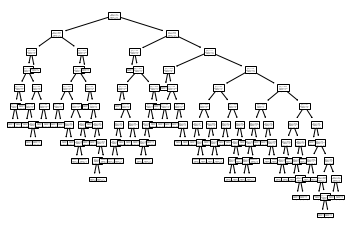

In [44]:
tree.plot_tree(model);

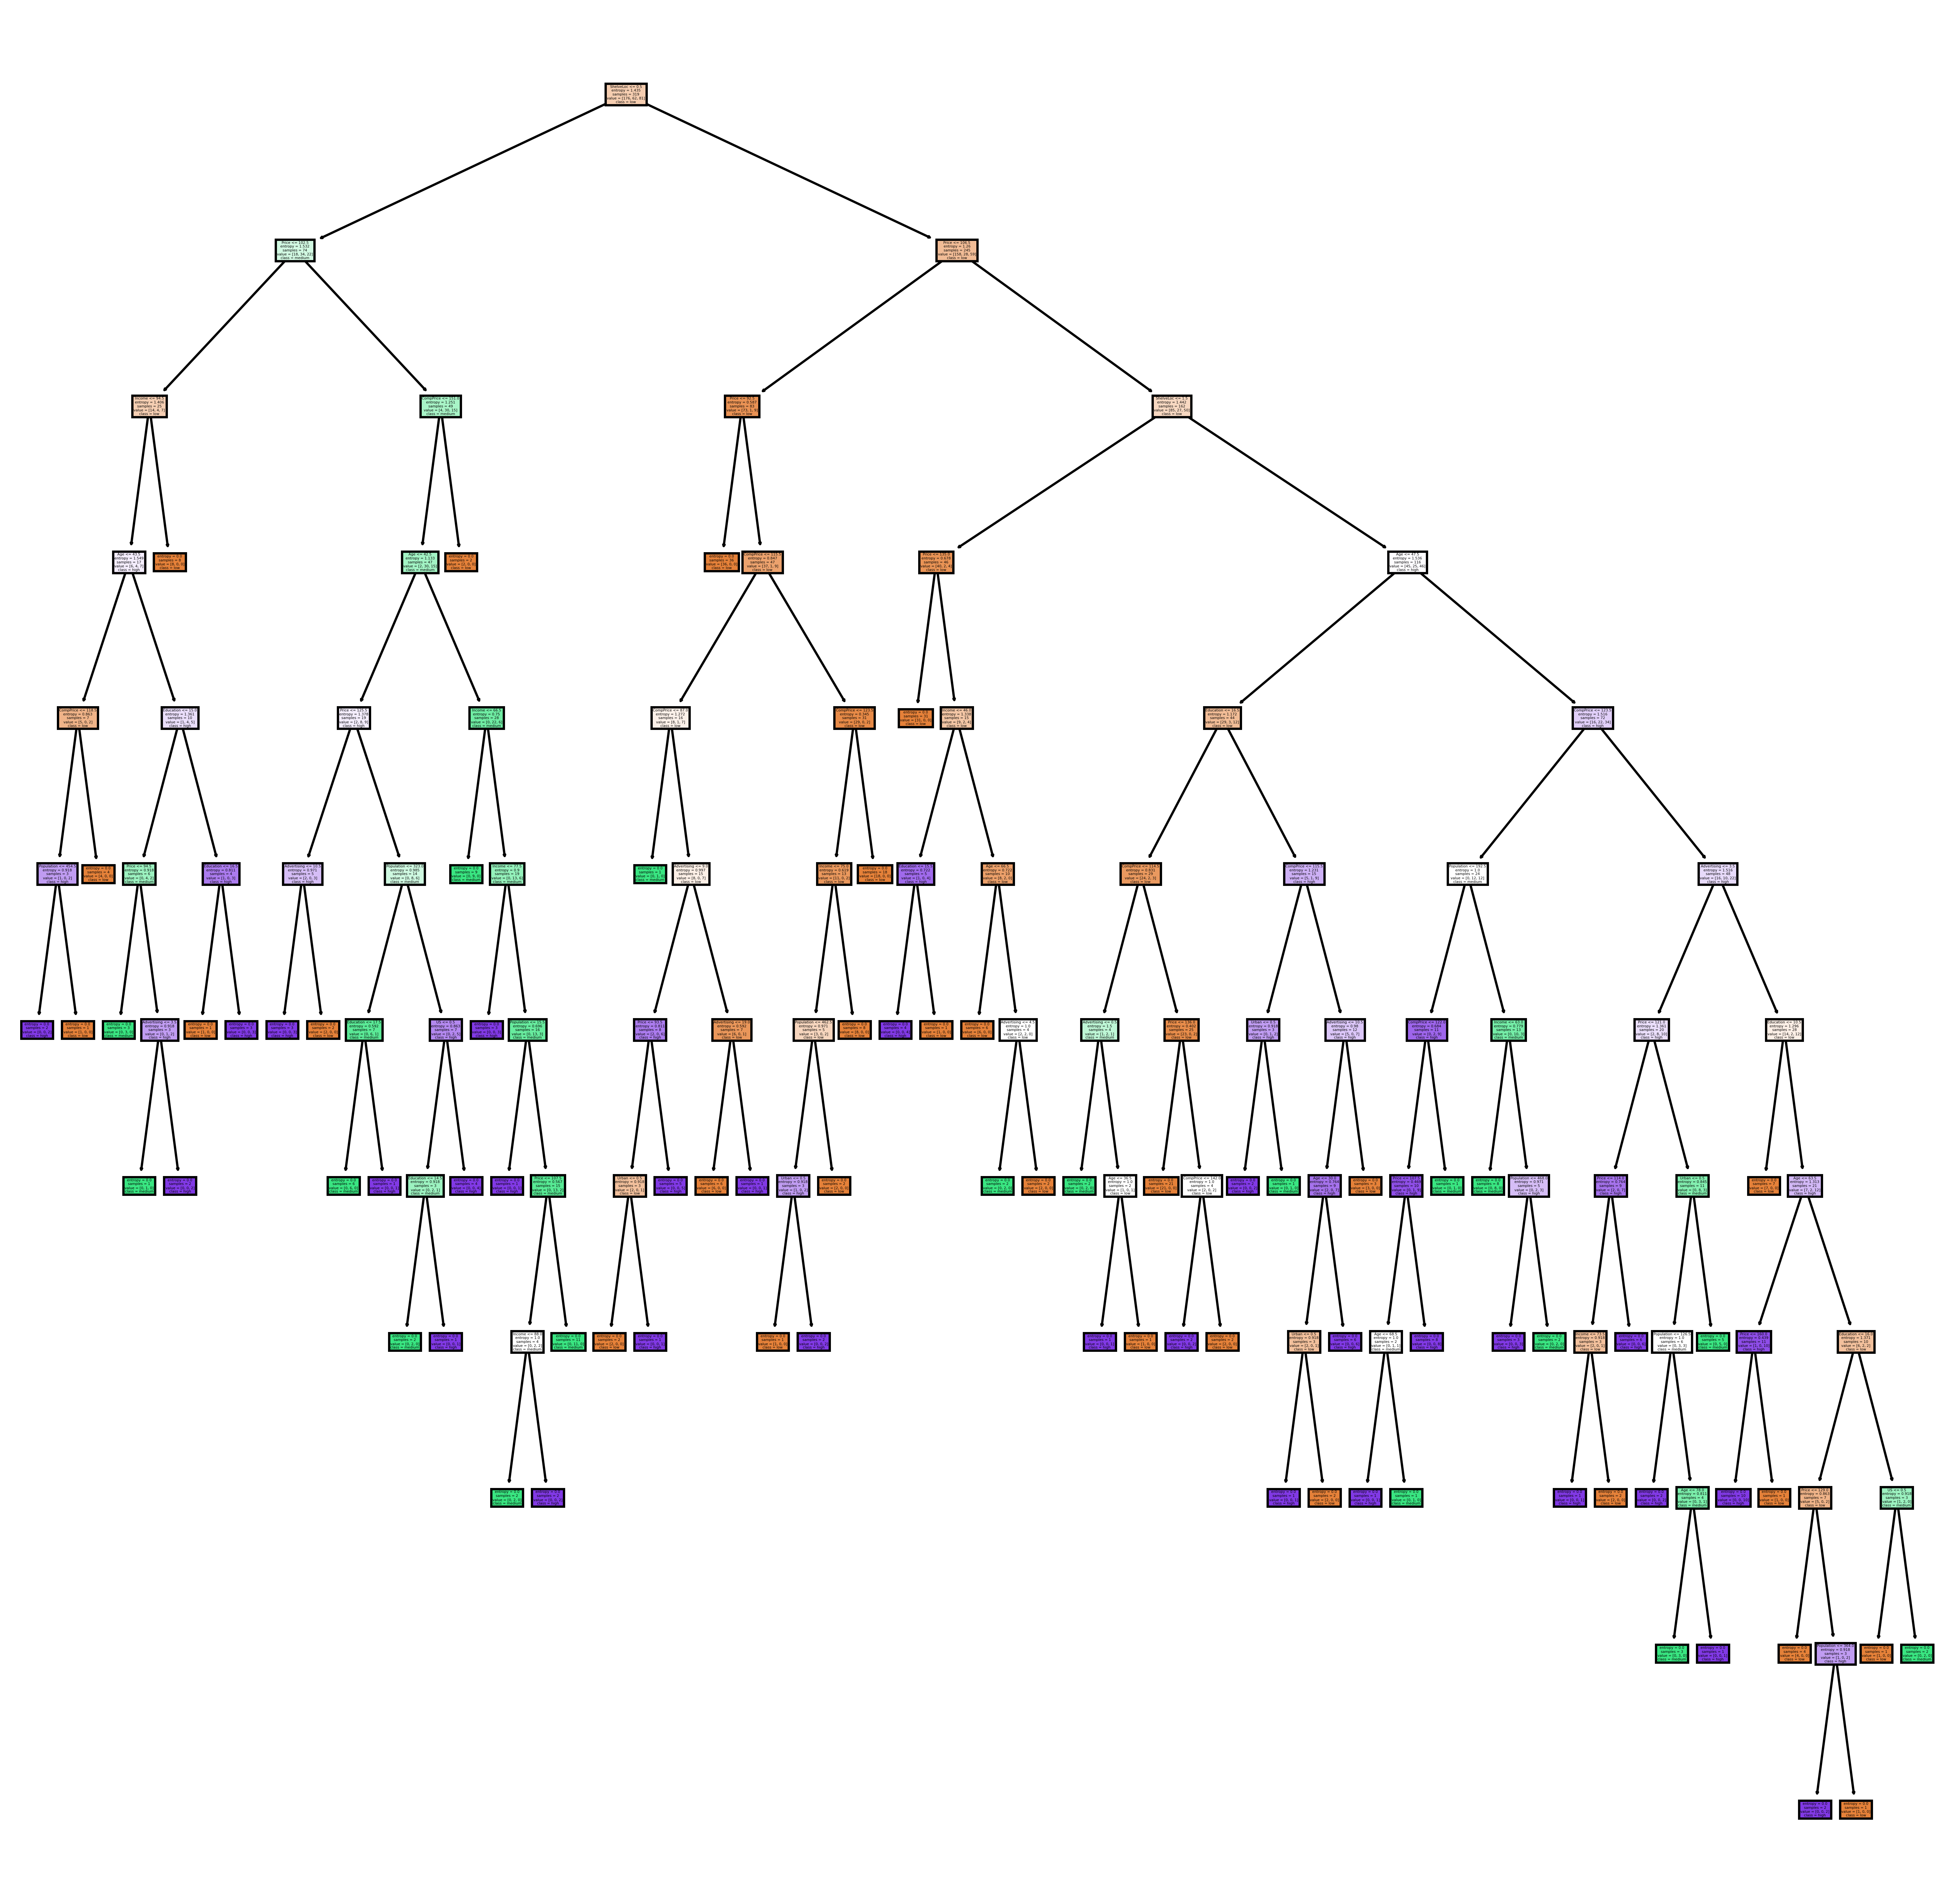

In [45]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['low', 'medium', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [46]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

0    42
2    19
1    19
dtype: int64

In [47]:
preds

array([0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0,
       1, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0,
       0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 0, 1])

In [48]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Sales,,,
0,32,3,5
1,1,9,4
2,9,7,10


In [49]:
np.mean(preds==y_test)

0.6375